Dennis Piliptchak

Exercise 1 mostly generated with ChatGPT 3.5 using the following prompt:

Write Python code to complete this text classification exercise:
1. Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data
2. Take a look at the data and get info about the data
3. Count the number of expressed sentiments by category
4. Provide a histogram of sentiments by category
5. Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers
6. Split dataset (the test dataset represents 30% of the total data).
7. Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.
8. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.
9. Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.
10.Build the Text Classification Model using TF-IDF.
11.First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.
12.Then, fit your model on a train set using fit() and perform prediction on the test
set using predict().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/denap/Downloads/train.tsv", sep='\t')

In [3]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
df.shape

(156060, 4)

In [5]:
# Get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
# Count the number of expressed sentiments by category
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

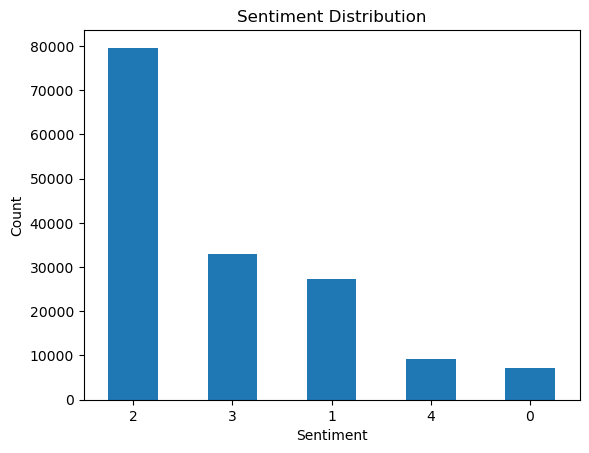

In [7]:
# Provide a histogram of sentiments by category
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=0)
plt.show()

In [8]:
# Generate document term matrix using CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b') # Tokenize and remove symbols and numbers
X = vectorizer.fit_transform(df['Phrase'])
y = df['Sentiment']

In [9]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create Multinomial Naive Bayes classifier object
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Test the classifier
y_pred = nb_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6112392669486095


In [10]:
# Use TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Phrase'])

# Split dataset for TF-IDF
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Build the Text Classification Model using TF-IDF
nb_classifier_tfidf = MultinomialNB()

# Train the classifier
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Test the classifier
y_pred_tfidf = nb_classifier_tfidf.predict(X_test_tfidf)

# # Compute accuracy
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print("TF-IDF Accuracy:", accuracy_tfidf)

TF-IDF Accuracy: 0.5815284719552309


In [11]:
# Exercise 2 using IBM Natural Language Understanding Sentiment Example

import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 \
    import Features, SentimentOptions

authenticator = IAMAuthenticator('B6b5Dz_zySBHTDw1dwkY5ct5--3B7SqM6H4gOMOKt9tM')
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2022-04-07',
    authenticator=authenticator
)

natural_language_understanding.set_service_url('https://api.us-east.natural-language-understanding.watson.cloud.ibm.com/instances/f6bf9f71-2c19-441b-a45b-ed41b2483e42')

response = natural_language_understanding.analyze(
    text="""The United Kingdom suffered one of the worst recessions among major economies last year. Germany, for example, held up better in the pandemic than it did during the global financial crisis. Provisional estimates suggest Europe's biggest economy contracted by 5% last year. EU GDP, meanwhile, is expected to have shrunk 6.4%, according to Eurostat.
The United States fared even better by comparison, with GDP decreasing by 3.5% from the prior year.
"Today's figures show that the economy has experienced a serious shock as a result of the pandemic, which has been felt by countries around the world," UK finance minister Rishi Sunak said in a statement. "While there are some positive signs of the economy's resilience over the winter, we know that the current lockdown continues to have a significant impact on many people and businesses."
The new national lockdown in the United Kingdom, imposed on January 5, is expected to hit the economy hard in the first quarter of 2021, reversing the return to growth in the fourth quarter of 2020.
"It seems that a double dip [recession] was merely delayed rather than avoided outright," Sam Miley, an economist at the London-based Centre for Economics and Business Research said in a note on Friday.
Disruption to EU-UK trade following the end of the Brexit transition period on December 31 is also weighing on activity.""",
    features=Features(sentiment=SentimentOptions(targets=['United Kingdom', 'Germany', 'Europe']))).get_result()

print(json.dumps(response, indent=2))


{
  "usage": {
    "text_units": 1,
    "text_characters": 1362,
    "features": 1
  },
  "sentiment": {
    "targets": [
      {
        "text": "United Kingdom",
        "score": -0.705539,
        "label": "negative"
      },
      {
        "text": "Germany",
        "score": -0.740705,
        "label": "negative"
      },
      {
        "text": "Europe",
        "score": -0.83083,
        "label": "negative"
      }
    ],
    "document": {
      "score": -0.677186,
      "mixed": "1",
      "label": "negative"
    }
  },
  "language": "en"
}


Source: https://medium.com/mlearning-ai/ai-in-the-real-world-2-sentiment-analysis-using-spacy-pipelines-b39a2618d7c1

In [12]:
# Uses pretrained model
import eng_spacysentiment

nlp = eng_spacysentiment.load()

# Article text
text = "Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy initially sparked by her testimony at a congressional hearing on antisemitism, and later focusing on allegations of plagiarism in work she had produced throughout her academic career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a particularly serious charge in academia: In 2021, the president of the University of South Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a commencement speech. Plagiarism includes a broad range of possible offenses, from improperly placing a citation to claiming credit for another scholar’s research or insight, and individual institutions develop their own policies for evaluating and responding to allegations of research misconduct. Gay defended her academic record in an op-ed published Wednesday in the New York Times, saying that she addressed attribution issues promptly after learning about them, and that “I have never misrepresented my research findings, nor have I ever claimed credit for the research of others. Moreover, the citation errors should not obscure a fundamental truth: I proudly stand by my work and its impact on the field.”"

# Compute sentiment
doc = nlp(text)

# Print result
doc.cats

C:\Users\denap\anaconda3\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
C:\Users\denap\anaconda3\Lib\site-packages\transformers\utils\generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


{'positive': 0.9880738854408264,
 'negative': 0.011926074512302876,
 'neutral': 2.1632191593567995e-09}